# Calibration
---------------------------------

This example shows us how to use the calibration method to calibrate a classifier.

The data used is a variation on the Australian weather dataset from [https://www.kaggle.com/jsphyg/weather-dataset-rattle-package](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package). The goal of this dataset is to predict whether or not it will rain tomorrow training a binay classifier on target `RainTomorrow`.

## Load the data

In [1]:
# Import packages
import pandas as pd
from atom import ATOMClassifier

In [2]:
# Get the dataset's features and targets
X = pd.read_csv('./datasets/weatherAUS.csv')

# Let's have a look at the data
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed
83031,Brisbane,15.1,24.4,0.0,7.8,8.7,ESE,31.0
129973,Launceston,14.3,27.2,0.0,NaN,NaN,SSE,28.0
94080,Adelaide,14.4,29.5,0.0,7.6,11.9,SSE,31.0
105091,Woomera,15.6,30.7,0.0,15.4,12.5,SSW,54.0
83682,Brisbane,20.1,28.8,0.0,5.2,5.2,NNE,24.0


## Run the pipeline

In [3]:
# Initialize the ATOM class
atom = ATOMClassifier(X, 'RainTomorrow', n_rows=1e4, verbose=1, warnings='ignore', random_state=1)
atom.clean()

# Handle missing values and categorical columns in the dataset
atom.impute(strat_num='median', strat_cat='most_frequent')
atom.encode(strategy='target', max_onehot=5, frac_to_other=0.05)

# Fit a linear SVM to the data
atom.run('lsvm')

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ================== >>
Shape: (10000, 22)
Missing values: 22613
Categorical columns: 5
Scaled: False
-----------------------------------
Train set size: 8000
Test set size: 2000

Applying data cleaning...
Fitting Imputer...
Imputing missing values...
Fitting Encoder...
Encoding categorical columns...

Training ===================================== >>
Models: lSVM
Metric: f1


Results for Linear-SVM:         
Fit ---------------------------------------------
Train evaluation --> f1: 0.5634
Test evaluation --> f1: 0.5898
Time elapsed: 0.495s
-------------------------------------------------
Total time: 0.500s


Final results ========================= >>
Duration: 0.502s
------------------------------------------
Linear-SVM --> f1: 0.590


## Analyze the results

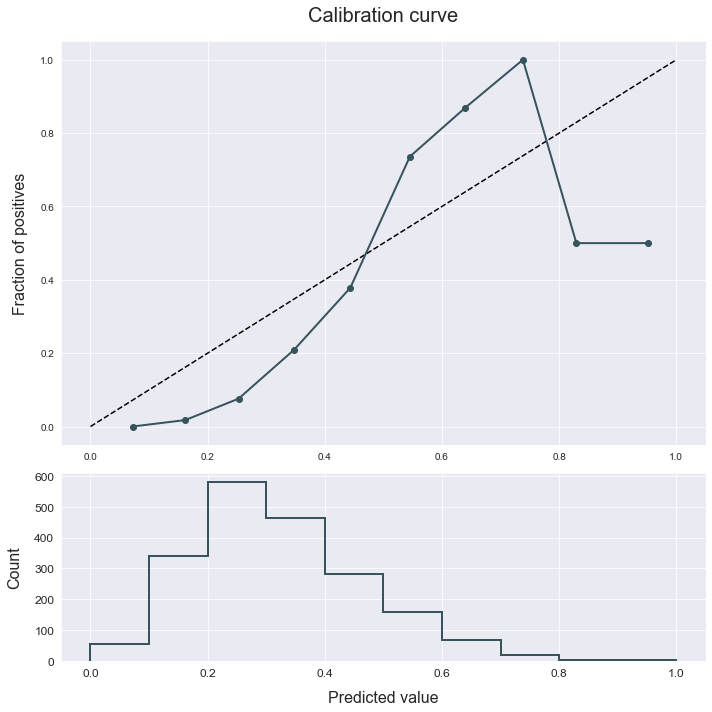

In [4]:
# Check our model's calibration
atom.plot_calibration()

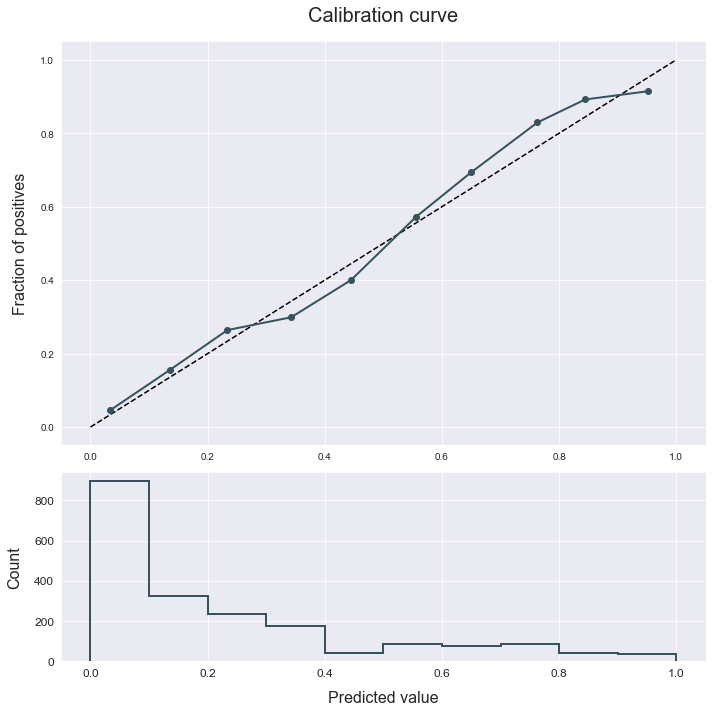

In [5]:
# Let's try to improve it using the calibrate method
atom.calibrate(method='isotonic', cv=5)
atom.plot_calibration()